In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from math import log2

In [198]:
#Read train data
PATH = r"C:/Users/marty/Desktop/credit_card_fraud/train.csv"
data = pd.read_csv(PATH)

### EDA

Similar to the previous challenges, we are first going to start with exploratory data analysis. As usual, we will have a look at the head values of our data, check whether there are any Null values and do some initial visualization

In [200]:
#Have a look at values
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,id
0,26833.0,-20.532751,12.373989,-23.009003,6.144821,-15.587296,-4.384491,-15.939003,13.696416,-3.948455,...,-1.466115,-0.856779,0.125777,1.402587,-0.223755,1.574249,0.469201,99.99,1,0
1,103443.0,1.895993,-0.011263,-1.697574,0.535603,1.018850,0.184163,0.361167,-0.175396,1.694461,...,0.578767,0.063445,-1.033252,0.192139,-0.121096,-0.012608,-0.080000,33.00,0,1
2,55618.0,-7.427924,2.948209,-8.678550,5.185303,-4.761090,-0.957095,-7.773380,0.717309,-3.682359,...,0.610479,0.789023,-0.564512,0.201196,-0.111225,1.144599,0.102280,130.44,1,2
3,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1,3
4,8886.0,-2.535852,5.793644,-7.618463,6.395830,-0.065210,-3.136372,-3.104557,1.823233,-3.878658,...,-0.448060,-0.402407,-0.288835,1.011752,0.425965,0.413140,0.308205,1.00,1,4


In [201]:
#Look the columns
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'id'],
      dtype='object')

In [202]:
#Check if there are any null values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
id        0
dtype: int64

In [242]:
#Check the number of values for each category (1 - fraudulent, 0 - non-fraudulent)
data.Class.value_counts()

1    379
0    371
Name: Class, dtype: int64

As it can be seen from the cell above, the number of fraudulent and non-fraudulent data cases is not equal (the original dataset had even larger difference). Keep this in mind when choosing splitting function.

Now, let's plot some initial graphs to observe any correlation.

<Figure size 1440x720 with 0 Axes>

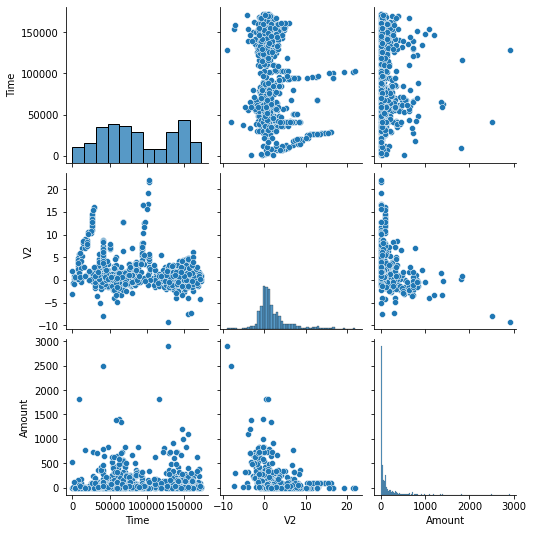

In [204]:
#Plotting data
plt.figure(figsize=(20,10))
sns.pairplot(data[["Time", "V2", "Amount"]])

As we can seen, some of the graphs (*Time-V2*, *Time-Amount*) have a linear relationship except for a few outliers. As the fraudulent cases will most probably be outliers, let's look at one of these graphs more in depth.

C:\Users\marty\anaconda3\envs\ai_learning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time', ylabel='V2'>

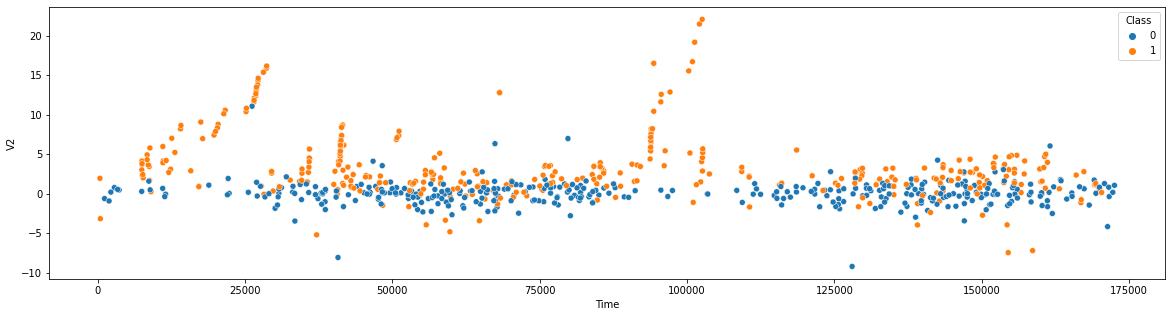

In [205]:
#Plotting one of the variables (up to you which one) against time
plt.figure(figsize=(20,5))
sns.scatterplot(data["Time"], data["V2"], hue = data["Class"])

## Preprocessing

Before building our model, we first need to do some data preprocessing. First, we will need to extract the features and labels. In addition, we are going to drop some of the less relevant features that could distort the model training (you can play around with the categories).

In [216]:
#Extracting features-labels and dropping some of the columns
X = data.drop(['Class', 'Time', 'Amount'], axis=1)
y = data['Class']

As it was discussed at the start of the lecture, the data scaling can be very beneficial especially when dealing with outlier and large number of features.

In [217]:
#Scaling features (use RobustScaler)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)

Finally, convert your features and labels to numpy arrays.

In [218]:
#Convert labels to an array and expand dimensions in axis = -1
y = y.to_numpy(dtype=np.float64)
y = np.expand_dims(y, axis = -1)

### Dimensional reduction

As we saw in the EDA section, our data contains 28 features that are not very informative. Logically, we will need to reduce the size of our feature dataset which can be achieved with PCA.

In [219]:
#Pass features through PCA
pca = PCA(2)
X = pca.fit_transform(X)

### Data splitting

Finally, split the dataset into train and test data.

In [220]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, shuffle=True)

Before building our model, we first need to transpose our train and test arrays (to exchange the dimensions).

In [221]:
#Transpose splitted arrays
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

## Creating model

Finally, we can build our neural network. To make everything easier to use, the whole model is built as a class object. Since the problem itself is quite complex, we are going to use multiple dense layers and nodes. For the activation functions, the hidden layers will have the *relu* function, while for the last layer, we are going to use *sigmoid* function.

As we are dealing with the categorical inbalanced dataset, we are going to use *cross entropy loss*.

In [239]:
class DenseLayer:
    def __init__(self, input_dimension, units, activation='', multiplier=0.01):
        
        self.weights, self.bias = self.initialize(input_dimension, units, multiplier)
        
        if activation == 'sigmoid':
            self.activation = activation
            self.activation_forward = self.sigmoid
            self.activation_backward = self.sigmoid_grad
        elif activation == 'relu':
            self.activation = activation
            self.activation_forward = self.relu
            self.activation_backward = self.relu_grad

    def initialize(self, input_size, nodes, multiplier):
        weights = multiplier * np.random.randn(nodes, input_size)
        bias = np.zeros([nodes, 1])
        return weights, bias
    
    def sigmoid(self, Z):

        A = 1 / (1 + np.exp(-Z))
        return A
        
    def sigmoid_grad(self, dA):

        s = 1 / (1 + np.exp(-self.prevZ))
        dZ = dA * s * (1 - s)
        return dZ
    
    
    def relu(self, Z):

        A = np.maximum(0, Z)
        return A
        
    def relu_grad(self, dA):

        s = np.maximum(0, self.prevZ)
        dZ = (s>0) * 1 * dA
        return dZ 
        
    
    def forward(self, A):

        Z = np.dot(self.weights, A) + self.bias
        self.prevZ = Z
        self.prevA = A
        A = self.activation_forward(Z)
        return A
    
    
    def backward(self, dA):

        dZ = self.activation_backward(dA)
        m = self.prevA.shape[1]
        self.dW = 1 / m * np.dot(dZ, self.prevA.T)
        self.db = 1 / m * np.sum(dZ, axis=1, keepdims=True)
        prevdA = np.dot(self.weights.T, dZ)
        return prevdA
    
    
    def update(self, lr):

        self.weights = self.weights - lr * self.dW
        self.bias = self.bias - lr * self.db

        
    def output_dimension(self):

        return len(self.bias)


class NeuralNetwork:
    
    def __init__(self, multiplier = 0.01):

        self.layers=[]
        self.multiplier = multiplier
        self.loss_function = self.cross_entropy_loss
        self.loss_backward = self.cross_entropy_loss_grad
        
    def add_layer(self, input_dimension=None, units=1, activation=''):
        
        if (input_dimension is None):
            input_dimension=self.layers[-1].output_dimension()
        layer = DenseLayer(input_dimension, units, activation, multiplier= self.multiplier)
        self.layers.append(layer)

    def cross_entropy_loss(self, Y, A, epsilon=1e-15):

        m = Y.shape[1]
        loss = -1 * (Y * np.log(A + epsilon) + (1 - Y) * np.log(1 - A + epsilon))
        cost = 1 / m * np.sum(loss)
        return np.squeeze(cost)
            
    def cross_entropy_loss_grad(self, Y, A):

        dA = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
        return dA

    
    def cost(self, Y, A):

        return self.loss_function(Y, A)

        
    def forward(self, X):

        x = np.copy(X)
        for layer in self.layers:
            x = layer.forward(x)
        return x
                
    def backward(self, A, Y):

        dA = self.loss_backward(Y, A)
        for layer in reversed(self.layers):
            dA = layer.backward(dA)
    
    
    def update(self, lr=0.03):

        for layer in self.layers:
            layer.update(lr)
    

As we have defined our model, now it's time to actually use it. Try different layer and node combinations for the maximum accuracy.

In [240]:
#Extracting input dimension
input_size = X_train.shape[0]

#Creating model object
model = NeuralNetwork()

#Adding layers
model.add_layer(input_dimension=nx, units=128, activation='relu')

#Adding final layer
model.add_layer(units=1, activation='sigmoid')

After creating and optimizing the model, test it by running the cell below.

In [241]:
#State the number of iterations
num_iterations = 90

def round_value(A):
    return np.uint8(A > 0.5)

def accuracy(yhat, Y):
    return round(np.sum(yhat==Y) / len(yhat.flatten()) * 1000) / 10

for idx in range(1, num_iterations+1):
    A = model.forward(X_train)
    model.backward(A, y_train)
    model.update(lr=0.03)
    if idx % 5 == 0:
        yhat = round_value(A)
        print('cost:', model.cost(y_train, A), f'\taccuracy: {accuracy(yhat, y_train)}%')

cost: 0.692230525053761 	accuracy: 50.5%
cost: 0.6915024022915891 	accuracy: 50.5%
cost: 0.69075565223624 	accuracy: 50.5%
cost: 0.6899720470550719 	accuracy: 50.5%
cost: 0.6891413007300243 	accuracy: 50.5%
cost: 0.6882490769059367 	accuracy: 50.5%
cost: 0.6872855978540254 	accuracy: 50.3%
cost: 0.6862350156344806 	accuracy: 50.3%
cost: 0.6850759016519922 	accuracy: 50.3%
cost: 0.6837936131542145 	accuracy: 50.5%
cost: 0.6823737134851366 	accuracy: 51.4%
cost: 0.6808003683616323 	accuracy: 59.8%
cost: 0.6790573245365165 	accuracy: 70.5%
cost: 0.6771320925637886 	accuracy: 77.5%
cost: 0.6750151287585285 	accuracy: 79.2%
cost: 0.6726962095930162 	accuracy: 80.6%
cost: 0.6701694428602751 	accuracy: 81.1%
cost: 0.667435571669923 	accuracy: 82.3%
